In [1]:
import pandas as pd

In [3]:
# Load your data
df = pd.read_csv("./data/EDDMQoLDatasetDepository.csv")

# Select relevant columns
stress_cols = [
    "MeanTotalDDS", "TotalDDS", "MeanEmotionalBurden", "MeanPhysicianDistress", 
    "MeanRegimenDistress", "MeanInterpersonalDistress", "TotalPHQ"
]

diabetes_cols = [
    "HbA1c", "CBG", "SBP", "DBP", "LDL", "HDL", "TG", "TotalC"
]

# Combine them
selected_cols = stress_cols + diabetes_cols

# Filter only these columns from dataset
df_corr = df[selected_cols].copy()

# Compute Pearson correlation
pearson_corr = df_corr.corr(method="pearson")

# Compute Spearman correlation
spearman_corr = df_corr.corr(method="spearman")

print("\n===== PEARSON CORRELATION =====")
print(pearson_corr)

print("\n===== SPEARMAN CORRELATION =====")
print(spearman_corr)



===== PEARSON CORRELATION =====
                           MeanTotalDDS  TotalDDS  MeanEmotionalBurden  \
MeanTotalDDS                   1.000000  1.000000             0.852419   
TotalDDS                       1.000000  1.000000             0.868105   
MeanEmotionalBurden            0.852419  0.868105             1.000000   
MeanPhysicianDistress          0.821258  0.822463             0.571839   
MeanRegimenDistress            0.901032  0.908214             0.750430   
MeanInterpersonalDistress      0.820973  0.830986             0.596918   
TotalPHQ                       0.496725  0.506689             0.544113   
HbA1c                          0.043495  0.036898             0.065504   
CBG                            0.054857  0.061218             0.067543   
SBP                           -0.156734 -0.156897            -0.103477   
DBP                           -0.070701 -0.082977            -0.034901   
LDL                            0.039189  0.023436             0.031155   
HDL  

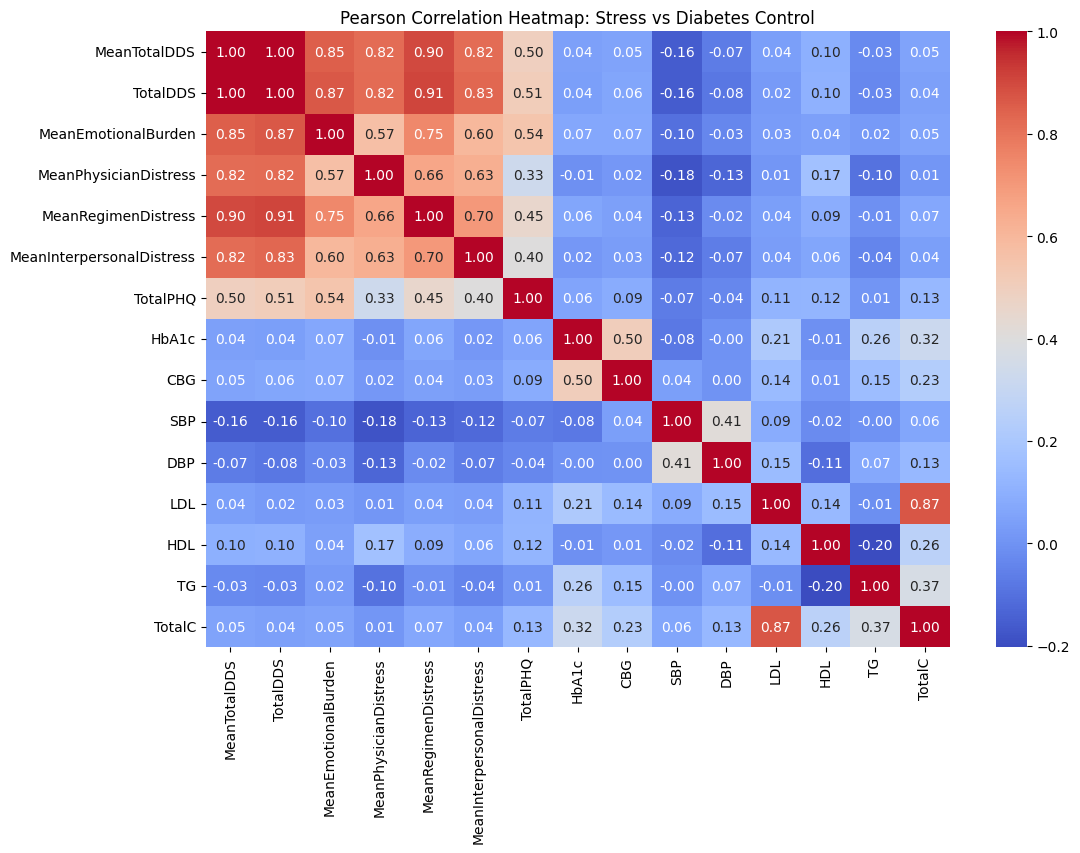

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap: Stress vs Diabetes Control")
plt.show()


In [9]:
# Convert Smoke3Cat to numeric if needed
df["Smoke3Cat"] = pd.to_numeric(df["Smoke3Cat"], errors="coerce")

# Select diabetes-related variables for correlation
cols = [
    "Smoke3Cat",
    "HbA1c",
    "CBG",
    "DiabetesDuration",
    "MicroCx1",
    "MacroCx1",
    "Stroke",
    "IHD",
    "Retino",
    "Nephro",
    "DFP"
]

df_corr = df[cols]


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == object:
        df[col] = le.fit_transform(df[col].astype(str))


In [12]:
df_corr = df[[
    "Smoke3Cat", "HbA1c", "CBG", "DiabetesDuration",
    "MicroCx1", "MacroCx1", "Stroke", "IHD", "Retino", "Nephro", "DFP"
]]

pearson_corr = df_corr.corr(method="pearson")
spearman_corr = df_corr.corr(method="spearman")


In [14]:
print(spearman_corr)

                  Smoke3Cat     HbA1c       CBG  DiabetesDuration  MicroCx1  \
Smoke3Cat          1.000000  0.022385 -0.015364         -0.014023 -0.009037   
HbA1c              0.022385  1.000000  0.498237          0.317007  0.078313   
CBG               -0.015364  0.498237  1.000000          0.159623 -0.053190   
DiabetesDuration  -0.014023  0.317007  0.159623          1.000000  0.190517   
MicroCx1          -0.009037  0.078313 -0.053190          0.190517  1.000000   
MacroCx1           0.037769  0.001063  0.000184          0.105999  0.134435   
Stroke             0.058910 -0.047577 -0.002629          0.032030  0.076004   
IHD               -0.008484  0.011931 -0.006710          0.116242  0.123843   
Retino            -0.030482  0.098418  0.015017          0.150783  0.583580   
Nephro            -0.026108  0.058538  0.018259          0.161319  0.657369   
DFP                0.031973  0.002250 -0.076382          0.043122  0.629242   

                  MacroCx1    Stroke       IHD    R

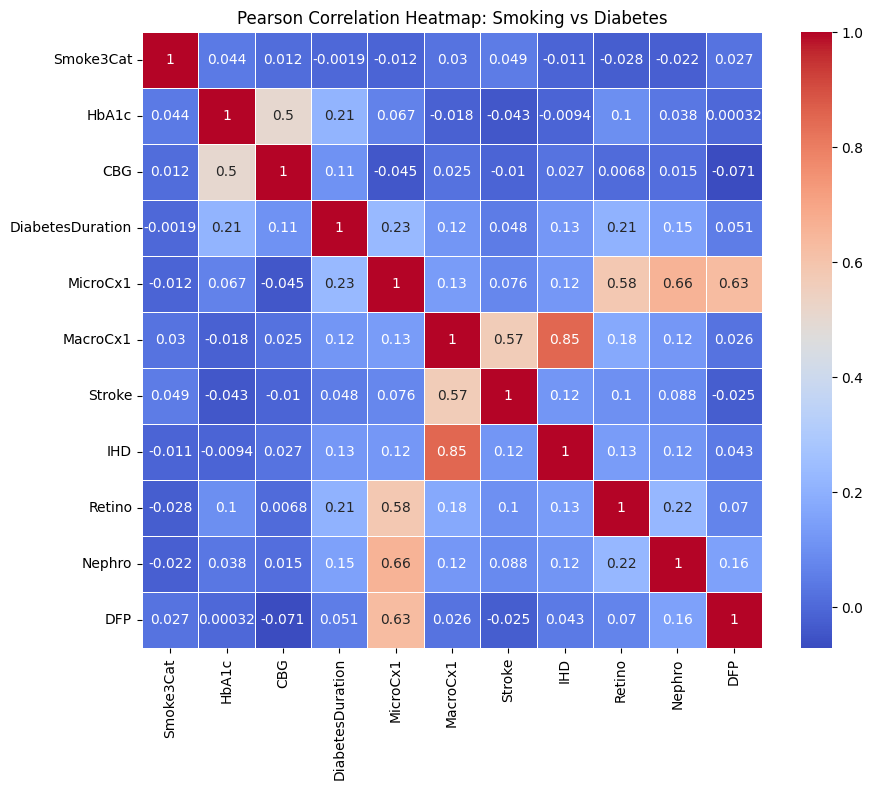

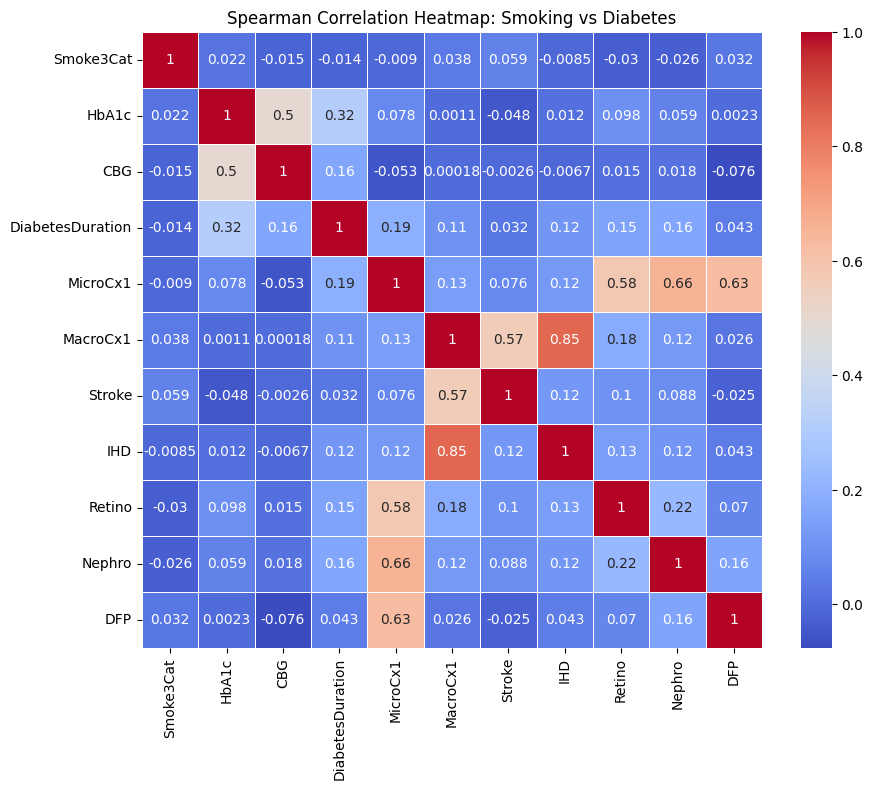

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Heatmap: Smoking vs Diabetes")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Heatmap: Smoking vs Diabetes")
plt.show()



===== CORRELATION COEFFICIENTS =====
                           Smoke3Cat  MeanTotalDDS  MeanEmotionalBurden  \
Smoke3Cat                   1.000000     -0.001093            -0.010994   
MeanTotalDDS               -0.001093      1.000000             0.870943   
MeanEmotionalBurden        -0.010994      0.870943             1.000000   
MeanPhysicianDistress       0.022773      0.817195             0.561729   
MeanRegimenDistress         0.011711      0.908865             0.752273   
MeanInterpersonalDistress  -0.034508      0.821317             0.603751   
HbA1c                       0.020274      0.047013             0.078458   
CBG                        -0.018901      0.037470             0.076860   
DiabetesDuration           -0.013771     -0.054326            -0.053495   

                           MeanPhysicianDistress  MeanRegimenDistress  \
Smoke3Cat                               0.022773             0.011711   
MeanTotalDDS                            0.817195             0.90

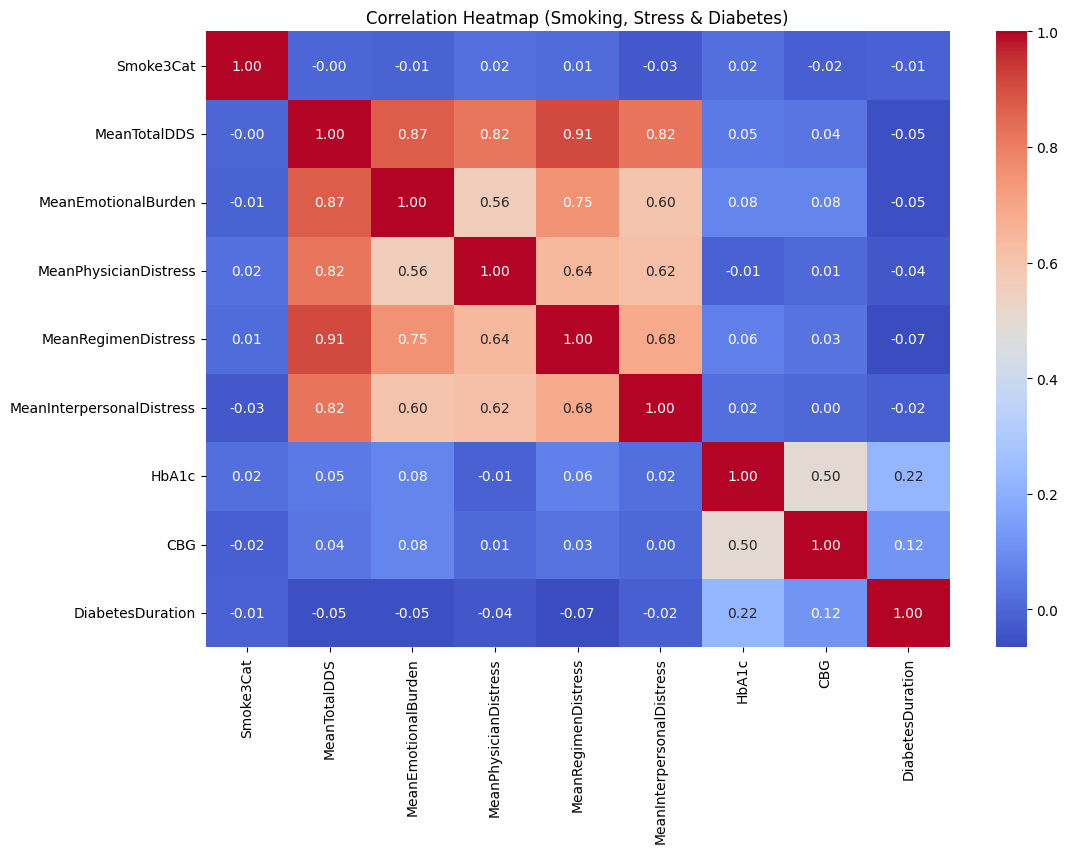

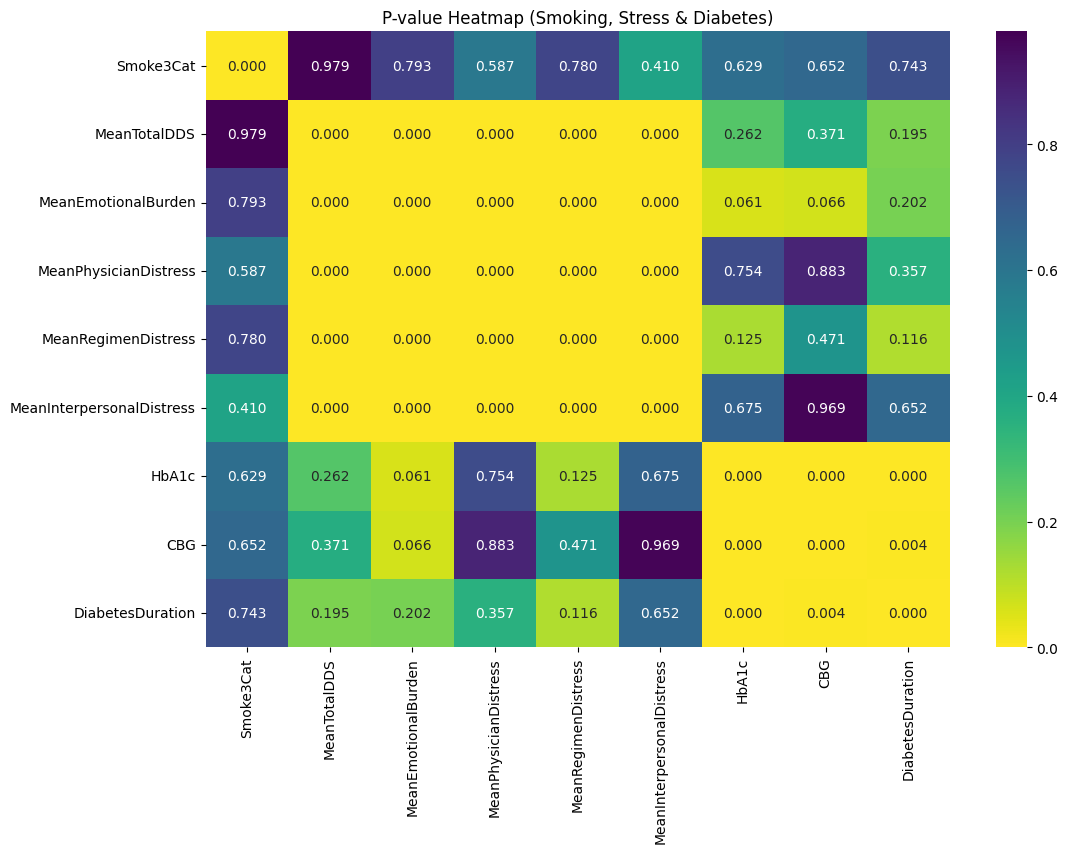

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# ---- SELECT RELEVANT COLUMNS ----
cols = [
    "Smoke3Cat", 
    "MeanTotalDDS", "MeanEmotionalBurden", "MeanPhysicianDistress",
    "MeanRegimenDistress", "MeanInterpersonalDistress",
    "HbA1c", "CBG", "DiabetesDuration"
]

df_sub = df[cols].copy()

# ---- CONVERT CATEGORICAL SMOKING TO NUMERIC ----
# Non-smoker=0, Ex-smoker=1, Current-smoker=2
df_sub["Smoke3Cat"] = df_sub["Smoke3Cat"].replace({"No": 0, "Ex-smoker": 1, "Yes": 2})

# ---- FUNCTION TO COMPUTE CORRELATION & P-VALUE MATRIX ----
def corr_pvalues(df):
    df_numeric = df.dropna()
    cols = df_numeric.columns
    corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    p_matrix = corr_matrix.copy()

    for i in cols:
        for j in cols:
            r, p = pearsonr(df_numeric[i], df_numeric[j])
            corr_matrix.loc[i, j] = r
            p_matrix.loc[i, j] = p

    return corr_matrix, p_matrix

# ---- COMPUTE ----
corr_matrix, p_matrix = corr_pvalues(df_sub)

print("\n===== CORRELATION COEFFICIENTS =====")
print(corr_matrix)

print("\n===== P-VALUES =====")
print(p_matrix)

# ---- HEATMAP FOR CORRELATION ----
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Smoking, Stress & Diabetes)")
plt.show()

# ---- HEATMAP FOR STATISTICAL SIGNIFICANCE ----
plt.figure(figsize=(12, 8))
sns.heatmap(p_matrix, annot=True, cmap="viridis_r", fmt=".3f")
plt.title("P-value Heatmap (Smoking, Stress & Diabetes)")
plt.show()
